# Cancer prediction based on RNA Sequence Analysis
==========================================

    By : Aarav Chandra and Dhananjay Nikam
***

***Importing the necessary packages and the dataset***

In [1]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import stats
%matplotlib inline
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, recall_score, f1_score, precision_score, accuracy_score , roc_auc_score, roc_curve, auc, pairwise_distances
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.base import clone
from itertools import combinations 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder , StandardScaler
from sklearn import feature_selection, model_selection, preprocessing
import math

***Importing Data sand Sampling***

In [2]:
df = pd.read_csv("./TCGA-PANCAN/data.csv", header=0)
df = df.rename(columns={"Unnamed: 0": "Patient ID"})
df_label = pd.read_csv("./TCGA-PANCAN/labels.csv", header=0)
df_label = df_label.rename(columns={"Unnamed: 0": "Patient ID"})

In [3]:
df.sample(5)

,Patient ID,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
300,sample_300,0.0,2.968773,3.078490,6.566817,9.115577,0.0,9.709370,1.238542,0.000000,...,6.086642,8.337934,10.423683,7.805022,8.950941,11.859729,10.620916,9.736067,8.253682,0.000000
187,sample_187,0.0,3.889172,4.101171,6.573458,9.592337,0.0,7.489447,0.371726,0.000000,...,5.407414,8.202712,9.513309,6.682208,9.736497,12.172896,10.089265,8.981156,4.196993,0.371726
435,sample_435,0.0,4.134196,3.722608,6.139899,9.642600,0.0,7.988401,1.683652,0.000000,...,7.490530,9.152830,10.088960,0.797013,10.310397,12.173708,10.976041,10.023505,6.391709,0.000000
147,sample_147,0.0,3.631116,3.031589,6.537832,9.601975,0.0,7.058901,0.000000,0.000000,...,6.246864,10.711478,10.187785,5.799318,10.712054,11.721753,10.348440,10.825364,7.888573,0.000000
786,sample_786,0.0,2.364460,3.180689,6.745049,9.499661,0.0,6.455861,0.881665,0.507211,...,6.988242,8.602038,10.236839,0.881665,9.886215,11.593288,10.266740,9.718165,4.348983,0.000000


***
#### Describing the data:
> - *info()*
> - *shape*
> - *head*
> - *describe*
> - *Checking for ***null*** values in the dataset.*
> - *Checking for any ***categorical*** data.*
***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Patient ID to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [5]:
print("Dataset Shape : ",df.shape) 
print("Dataset Size : ",df.size) 

Dataset Shape :  (801, 20532)
Dataset Size :  16446132


***Exploratory Data Analysis***

In [6]:
df.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [7]:
df_label.sample(5)

,Patient ID,Class
67,sample_67,PRAD
178,sample_178,BRCA
34,sample_34,PRAD
203,sample_203,KIRC
694,sample_694,BRCA


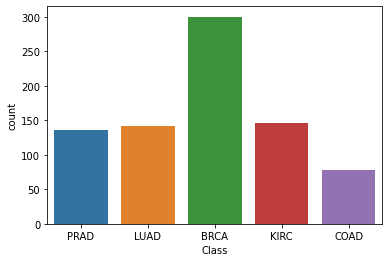

In [8]:
sns.countplot(df_label['Class'])
plt.show()

In [9]:
df_label.describe()

,Patient ID,Class
count,801,801
unique,801,5
top,sample_58,BRCA
freq,1,300


In [10]:
print('Number of patients: {}'.format(len(df)))

Number of patients: 801


In [11]:
print('Percantage of each type of cancer: \n{}'.format(df_label['Class'].value_counts(normalize = True)*100))

Percantage of each type of cancer: 
BRCA    37.453184
KIRC    18.227216
LUAD    17.602996
PRAD    16.978777
COAD     9.737828
Name: Class, dtype: float64


In [12]:
print('Number of null values:', df.isnull().sum().sum())

Number of null values: 0


In [13]:
df = df.assign(Class = pd.Series(df_label['Class'].values))

In [14]:
a = df.shape
a = a[0] * a[1]
b = (df != 0).sum(1).sum()
sparsity = 1 - (b/a)
print('Percentage of Sparsity of our Dataset: %.2f' % (sparsity*100))

Percentage of Sparsity of our Dataset: 14.22


In [15]:
print(df.shape)
print(a)

(801, 20533)
16446933


In [16]:
labelenc = preprocessing.LabelEncoder()
labelenc.fit(df['Class'].unique())
labelenc.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [17]:
labelenc.inverse_transform([0, 1, 2, 3, 4])
df['Class'] = labelenc.transform(df['Class'])
s = df['Class'].unique()
s.sort()
print(s)

[0 1 2 3 4]


In [18]:
X = np.array(df.iloc[:, 1:].values)
y = np.array(df.iloc[:, -1].values) 

***Making test and training data. 30% data for test***

In [19]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

***Learning Curve for Decision Tree***

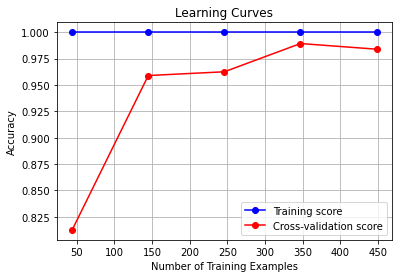

In [20]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=5, class_weight=None)
plt.figure()
plt.title("Learning Curves")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid()
train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, y_train, cv=5, random_state=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation score")
plt.legend(loc="best")

In [21]:
print('Population counts: %s' % Counter(y_train))

Population counts: Counter({0: 210, 2: 108, 4: 95, 3: 94, 1: 53})


***Handling the class imbalances problem using SMOTE***

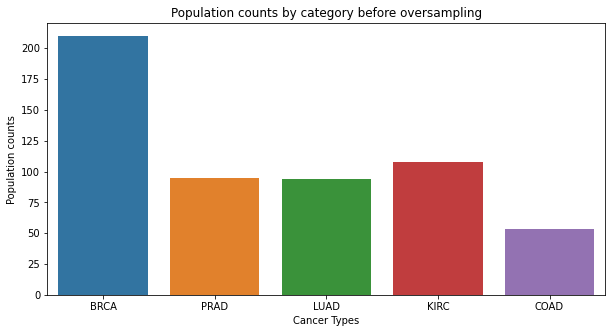

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(labelenc.inverse_transform(y_train)).set_title("Population counts by category before oversampling")
plt.xlabel("Cancer Types")
plt.ylabel("Population counts")
plt.show()

In [23]:
smote = SMOTE(sampling_strategy ='auto', k_neighbors=5, random_state=5)
X_smote, y_smote = smote.fit_resample(X_train, y_train)           
print('Population counts after resampling %s' % Counter(y_smote))

Population counts after resampling Counter({0: 210, 4: 210, 3: 210, 2: 210, 1: 210})


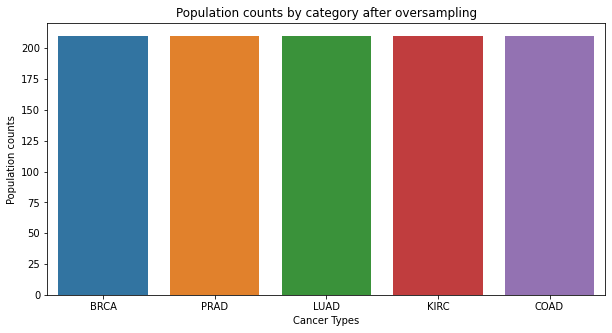

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(labelenc.inverse_transform(y_smote)).set_title("Population counts by category after oversampling")
plt.xlabel("Cancer Types")
plt.ylabel("Population counts")
plt.show()

***Feature Engineering***

***Feature Scaling***

In [25]:
stdsc = StandardScaler()

X_train = stdsc.fit_transform(X_smote)
X_test = stdsc.transform(X_test)
y_train = y_smote
X_train[0:5]

array([[-0.23577482, -0.15489153, -1.53179447, ...,  1.70569028,
        -0.29221236, -1.41421356],
       [-0.23577482,  1.0261741 ,  0.80452868, ..., -1.02707039,
        -0.29221236, -1.41421356],
       [-0.23577482,  1.65669236,  1.28963081, ...,  0.49990216,
        -0.29221236,  1.41421356],
       [-0.23577482,  0.95786001, -0.55403461, ...,  0.1190927 ,
        -0.29221236, -1.41421356],
       [-0.23577482, -1.60459312, -0.15749521, ...,  0.40979872,
        -0.29221236,  1.41421356]])

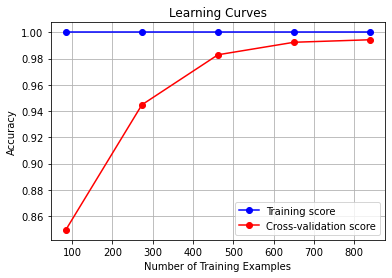

In [26]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=5, class_weight=None)
plt.figure()
plt.title("Learning Curves")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.grid()
train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, y_train, cv=5, random_state=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation score")
plt.legend(loc="best")

***Feature Importances***

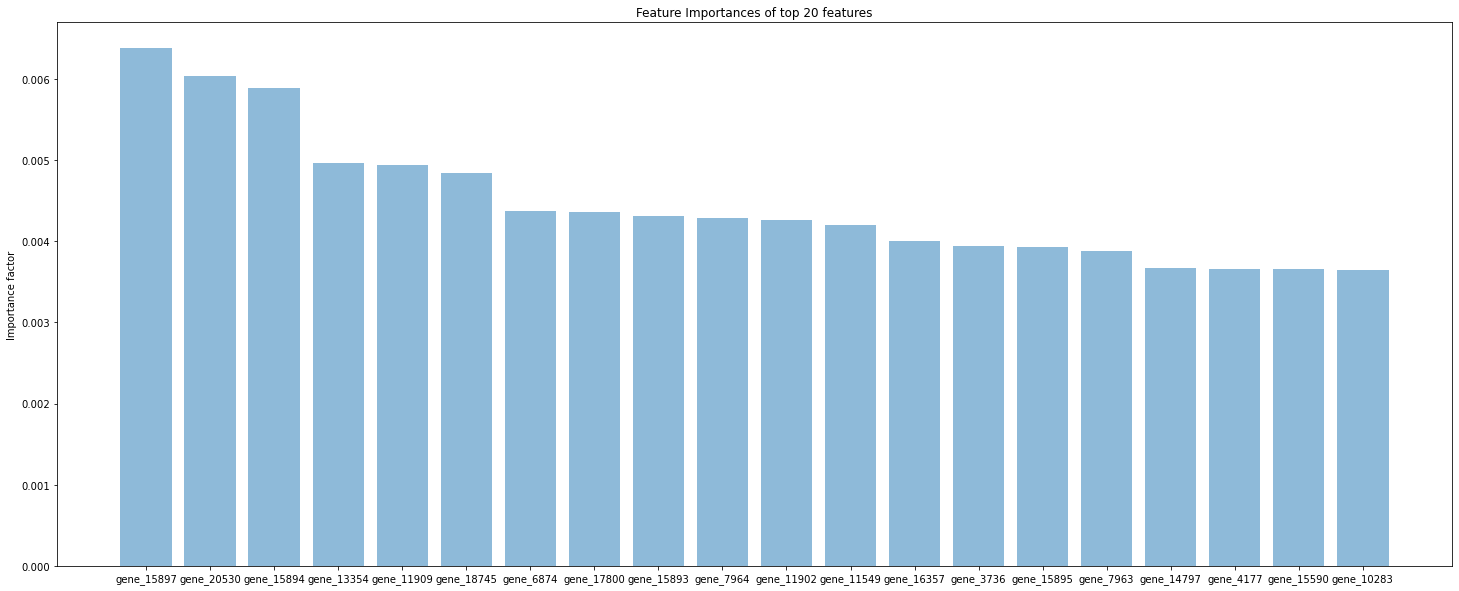

In [27]:
rnd_clf = RandomForestClassifier(n_estimators=1500, n_jobs=3)
rnd_clf.fit(X_train, y_train)
list_features = sorted(zip(rnd_clf.feature_importances_, df.columns), reverse=True, key = lambda x: x[0])
top_features = {}
for row in list_features[:20]:
    top_features[row[1]] = row[0]
plt.figure(figsize=(25, 10))
plt.bar(top_features.keys(), top_features.values(), align='center', alpha=0.5)
plt.ylabel('Importance factor')
plt.title('Feature Importances of top 20 features')
plt.show()

***Correlation Heatmap for the most important features***

Text(0.5, 1.0, 'Correlation heatmap for the top 20 important features')

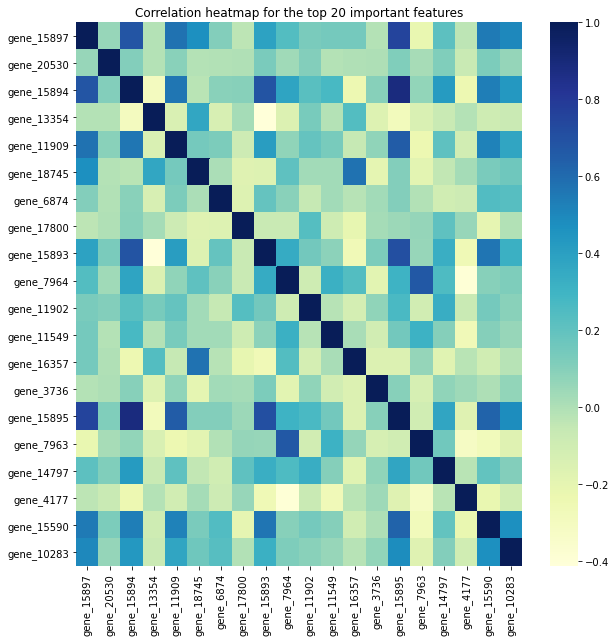

In [28]:
corr = df[top_features.keys()].corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,cmap="YlGnBu").set_title("Correlation heatmap for the top 20 important features")

***Implementing Baseline Models on the data***

***Logistic Regression***

In [29]:
model = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
training_prediction = model.predict(X_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y,average='weighted')}")
print(f"Precision Score:\t{precision_score(y_test,predicted_y,average='weighted')}")
print(f"F1 Score:\t\t{f1_score(y_test,predicted_y,average='weighted')}")
print(f"Accuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[210   0   0   0   0]
 [  0 210   0   0   0]
 [  0   0 210   0   0]
 [  2   0   0 208   0]
 [  0   0   0   0 210]]
Testing Confusion matrix:
 [[90  0  0  0  0]
 [ 0 25  0  0  0]
 [ 1  0 37  0  0]
 [ 1  0  0 46  0]
 [ 0  0  0  0 41]]

Recall Score:		0.991701244813278
Precision Score:	0.9918816525347285
F1 Score:		0.9916968713702753
Accuracy:		0.991701244813278


***Decision Tree***

In [30]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
training_prediction = model.predict(X_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y,average='weighted')}")
print(f"Precision Score:\t{precision_score(y_test,predicted_y,average='weighted')}")
print(f"F1 Score:\t\t{f1_score(y_test,predicted_y,average='weighted')}")
print(f"Accuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[210   0   0   0   0]
 [  0 210   0   0   0]
 [  0   0 210   0   0]
 [  0   0   0 210   0]
 [  0   0   0   0 210]]

Testing Confusion matrix:
 [[90  0  0  0  0]
 [ 1 24  0  0  0]
 [ 0  0 38  0  0]
 [ 0  1  0 46  0]
 [ 0  0  0  0 41]]

Recall Score:		0.991701244813278
Precision Score:	0.991746842369249
F1 Score:		0.9916903987006358
Accuracy:		0.991701244813278


***RandomForest Classifier***

In [31]:
model = RandomForestClassifier(n_estimators=10, bootstrap = True, max_features = 'sqrt')
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
training_prediction = model.predict(X_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y,average='weighted')}")
print(f"Precision Score:\t{precision_score(y_test,predicted_y,average='weighted')}")
print(f"F1 Score:\t\t{f1_score(y_test,predicted_y,average='weighted')}")
print(f"Accuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[210   0   0   0   0]
 [  0 210   0   0   0]
 [  0   0 210   0   0]
 [  0   0   0 210   0]
 [  0   0   0   0 210]]

Testing Confusion matrix:
 [[90  0  0  0  0]
 [ 0 24  0  1  0]
 [ 0  0 38  0  0]
 [ 2  0  0 45  0]
 [ 0  0  0  0 41]]

Recall Score:		0.9875518672199171
Precision Score:	0.9876420710806423
F1 Score:		0.9874881987431465
Accuracy:		0.9875518672199171


***Running all the baseline algorithms with PCA***

In [32]:
ml_alg_w0_PCA = [ ensemble.RandomForestClassifier(),    
    DecisionTreeClassifier(),
    LogisticRegression()
    ]

ml_alg_predict_w0_PCA = df.Class

In [36]:
ml_alg_columns_w0_PCA = ['Model Name','Train Accuracy Mean', 'Validation Accuracy Mean','Time']
ml_alg_compare__w0_PCA = pd.DataFrame(columns = ml_alg_columns_w0_PCA)
row_index = 0
models_res={}
for alg in ml_alg_w0_PCA:
    ml_alg_name_w0_PCA = alg.__class__.__name__
    
    ml_alg_compare__w0_PCA.loc[row_index, 'Model Name'] = ml_alg_name_w0_PCA
    pipe = Pipeline([('clf', alg)])
    
    cv_results = model_selection.cross_validate(pipe, X_train, y_train, cv=5, n_jobs=-1, verbose=False, return_train_score=True)
    models_res[ml_alg_name_w0_PCA] = cv_results
    ml_alg_compare__w0_PCA.loc[row_index, 'Time'] = cv_results['fit_time'].mean()
    ml_alg_compare__w0_PCA.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
    ml_alg_compare__w0_PCA.loc[row_index, 'Validation Accuracy Mean'] = cv_results['test_score'].mean()   
    pipe.fit(X_train, y_train)
    ml_alg_predict_w0_PCA[ml_alg_name_w0_PCA] = pipe.predict(X_test)
    y_true, y_pred = y_test, ml_alg_predict_w0_PCA[ml_alg_name_w0_PCA]
    ml_alg_compare__w0_PCA.loc[row_index, 'Test F1 Score'] = classification_report(y_true,y_pred, output_dict=True)['weighted avg']['f1-score']
    row_index+=1
ml_alg_compare__w0_PCA.sort_values(by = ['Test F1 Score'], ascending = False, inplace = True)
ml_alg_compare__w0_PCA

,Model Name,Train Accuracy Mean,Validation Accuracy Mean,Time,Test F1 Score
2,LogisticRegression,1,0.999048,18.1348,1.000000
1,DecisionTreeClassifier,1,0.992381,8.91502,0.995855
0,RandomForestClassifier,1,0.999048,7.40756,0.991697


***Dimensionality Reduction with PCA***


In [37]:
max1 = 0
max2 = 0
    
for i in range(2, 10):
    pipe = Pipeline([('pca', PCA(n_components=i, random_state=0)),
    ('clf', DecisionTreeClassifier())])
    pipe.fit(X_train, y_train)
    if(max1<pipe.score(X_test, y_test)):
        max1 = pipe.score(X_test, y_test)
        max2 = i

pca = PCA(n_components=max2)
principal_component = pca.fit_transform(X_train)
principal_df = pd.DataFrame(data=principal_component)
y_train_pca = pd.DataFrame(data = labelenc.inverse_transform(y_train), columns = ["Class"])
concat_df = pd.concat([principal_df, y_train_pca], axis=1)
max2

6

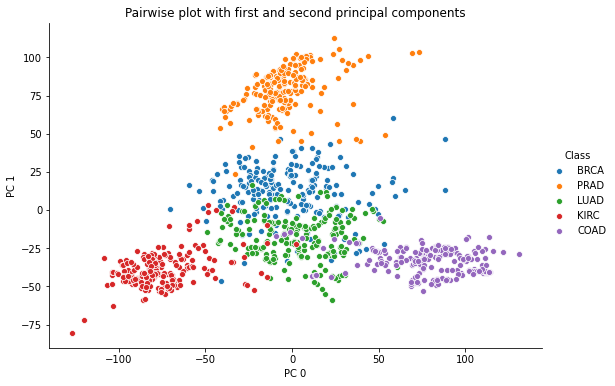

In [38]:
sns.pairplot(x_vars = 0, y_vars = 1,data=concat_df, hue="Class",height=5,aspect=1.5)
plt.title("Pairwise plot with first and second principal components")
plt.xlabel("PC 0")
plt.ylabel("PC 1")
plt.show()

***TSNE***

In [39]:
tsne = TSNE(n_components=2
            , random_state=0)
principal_component1 = tsne.fit_transform(X_train)
principal_df = pd.DataFrame(data=principal_component1)
y_train_tsne = pd.DataFrame(data = labelenc.inverse_transform(y_train), columns = ["Class"])
concat_df1 = pd.concat([principal_df, y_train_tsne], axis=1)

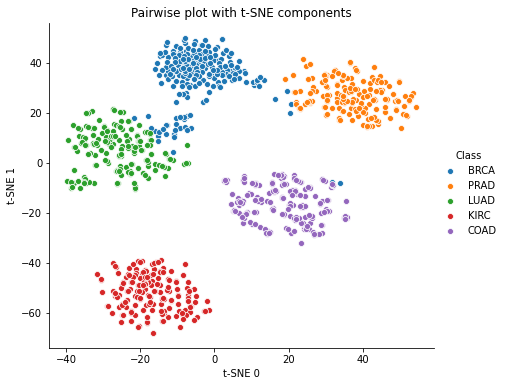

In [40]:
sns.pairplot(x_vars=0, y_vars=1, data=concat_df1, hue="Class",height=5,aspect=1.2)
plt.title("Pairwise plot with t-SNE components")
plt.xlabel("t-SNE 0")
plt.ylabel("t-SNE 1")
plt.show()

In [41]:
pca = PCA(n_components=.95)
X_train_practice_pca = pca.fit_transform(X_train)
tsne = TSNE(n_components=2
            , random_state=0)
principal_component1 = tsne.fit_transform(X_train_practice_pca)
principal_df = pd.DataFrame(data=principal_component1)
y_train_tsne = pd.DataFrame(data = labelenc.inverse_transform(y_train), columns = ["Class"])
concat_df1 = pd.concat([principal_df, y_train_tsne], axis=1)

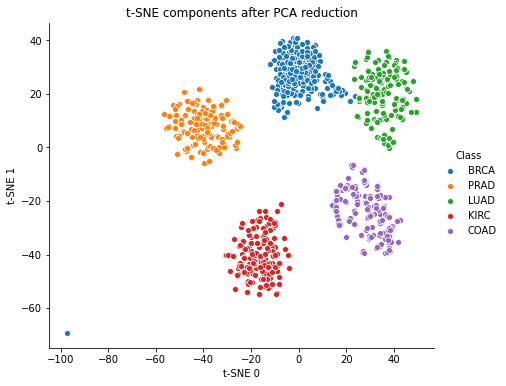

In [42]:
sns.pairplot(x_vars=0, y_vars=1, data=concat_df1, hue="Class",height=5,aspect=1.2)
plt.title("t-SNE components after PCA reduction")
plt.xlabel("t-SNE 0")
plt.ylabel("t-SNE 1")
plt.show()

***Model Selection***

In [43]:
def boxplot_cv_results(models_res):
    for model_name in models_res.keys():
        model_scores = pd.DataFrame.from_dict(models_res[model_name])
        model_scores[['test_score', 'train_score']].boxplot()
        plt.title(model_name)
        plt.show()

In [44]:
ml_alg = [ ensemble.RandomForestClassifier(),
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),    
    DecisionTreeClassifier(),
    svm.LinearSVC(),
    LogisticRegression()
    ]

ml_alg_predict = df.Class

In [45]:
ml_alg_columns = ['Model Name','Train Accuracy Mean', 'Validation Accuracy Mean','Time']
ml_alg_compare_pca = pd.DataFrame(columns = ml_alg_columns)
row_index = 0
models_res={}
for alg in ml_alg:
    ml_alg_name = alg.__class__.__name__
    
    ml_alg_compare_pca.loc[row_index, 'Model Name'] = ml_alg_name
    pipe = Pipeline([('pca', PCA(n_components=max2)),
                         ('clf', alg)])
    
    cv_results = model_selection.cross_validate(pipe, X_train, y_train, cv=5, n_jobs=-1, verbose=False, return_train_score=True)
    models_res[ml_alg_name] = cv_results
    ml_alg_compare_pca.loc[row_index, 'Time'] = cv_results['fit_time'].mean()
    ml_alg_compare_pca.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
    ml_alg_compare_pca.loc[row_index, 'Validation Accuracy Mean'] = cv_results['test_score'].mean()   
    pipe.fit(X_train, y_train)
    ml_alg_predict[ml_alg_name] = pipe.predict(X_test)
    y_true, y_pred = y_test, ml_alg_predict[ml_alg_name]
    ml_alg_compare_pca.loc[row_index, 'Test F1 Score'] = classification_report(y_true,y_pred, output_dict=True)['weighted avg']['f1-score']
    row_index+=1
ml_alg_compare_pca.sort_values(by = ['Test F1 Score'], ascending = False, inplace = True)
ml_alg_compare_pca

C:\Users\surya\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\surya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Model Name,Train Accuracy Mean,Validation Accuracy Mean,Time,Test F1 Score
5,LogisticRegression,0.999048,0.997143,4.15942,0.987527
4,LinearSVC,0.972143,0.975238,4.87861,0.966203
0,RandomForestClassifier,1,0.987619,5.30917,0.958641
3,DecisionTreeClassifier,1,0.973333,4.06228,0.946602
2,GaussianNB,0.970476,0.966667,5.47966,0.942655
1,BernoulliNB,0.925,0.917143,3.07524,0.867655
